In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from tensorflow.keras import backend as K
import random

from tensorflow.keras.layers import Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.layers import Input, Reshape, Dot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
url = 'https://raw.githubusercontent.com/zulfauzi92/Hotel_Recomendation_Model_Traveloka/main/Eksplorasi%20Data/Eksperimen/csv_eksperimen/goiboi%2Bdatafiniti_merge_user-collaborative-based.csv'
hotel_train_data = pd.read_csv(url)

In [29]:
hotel_train_data.head(2)

,property_id,user_id,user_rating,user_reviews,property_name,hotel_description,address,point_of_interest,city,state,...,Two Line Telephone,Utensils (on request),Video/ DVD/ CD Player Available,Voicemail.1,Wardrobe,Washing machine,Western Toilet Seat,Window Opens,Work Station,Working Desk Phone
0,H000001,0,4,Staff were helpful and friendly. Wireless inte...,Baragarh Regency,The standard check-in time is 12:00 PM and the...,"15th Mile, N.H.21,Manali, District Kullu,Himac...","['Hadimba Temple', 'Naggar Village', 'Himalaya...",Manali,Himachal Pradesh,...,0,0,0,0,0,0,1,1,0,0
1,H000001,6853,2,Service was fine but the hotel was worn down: ...,Baragarh Regency,The standard check-in time is 12:00 PM and the...,"15th Mile, N.H.21,Manali, District Kullu,Himac...","['Hadimba Temple', 'Naggar Village', 'Himalaya...",Manali,Himachal Pradesh,...,0,0,0,0,0,0,1,1,0,0


In [30]:
df = hotel_train_data[['user_id','property_id','user_rating']]

In [31]:
property= df['property_id']
values = property.values
values

array(['H000001', 'H000001', 'H000001', ..., 'H001431', 'H001432',
       'H001433'], dtype=object)

In [32]:
test = []
for item in range(len(values)):
  #print(values[item])
  test.append(int(values[item][1:]))

In [33]:
np.array(test)

array([   1,    1,    1, ..., 1431, 1432, 1433])

In [34]:
coba = pd.DataFrame(np.array(test))

In [35]:
df['property_id']=coba[0]
df['user_id'] += 1 

In [36]:
df.head(2)

,user_id,property_id,user_rating
0,1,1,4
1,6854,1,2


In [37]:
df['user_rating'] = df['user_rating'] / 5

In [38]:
# df['user_id'] = df['user_id'] / max(df['user_id'])
# df['property_id'] = df['property_id'] / max(df['property_id'])
# df = df[df.property_id < 1312]
more = df[df.property_id > 1311]
df

,user_id,property_id,user_rating
0,1,1,0.8
1,6854,1,0.4
2,4633,1,0.8
3,8326,1,0.8
4,2066,2,0.8
...,...,...,...
9743,9094,1429,0.2
9744,9100,1430,1.0
9745,9128,1431,0.8
9746,9171,1432,1.0


In [39]:
more = more['property_id']
more.values

array([1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322,
       1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333,
       1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1343,
       1343, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352,
       1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363,
       1364, 1364, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1370, 1370,
       1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381,
       1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392,
       1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403,
       1404, 1405, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413,
       1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424,
       1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433])

In [40]:
replace_val = []

for i in range(len(more)):
  n = random.randint(1,1311)
  replace_val.append(n)

test = np.array(replace_val)
test
# n_users = len(df.user_id.unique())
# n_users

array([ 967, 1218,  801,  369,  847,  258,  364,  812,  611, 1242, 1296,
        579,  730,  605,  467,  505,  377,  833,   17, 1217,  399,  571,
        981,   85,  369,   30,  611,  345,  783,  483,  413,  212,  126,
       1260,  505,  217, 1042, 1155, 1050,  540, 1252,  132,  664, 1002,
       1150,   45, 1167,  678,  720, 1049,  219, 1173, 1035,  721,  955,
        875,  749, 1174,  825,  381,  334,  403,  952,  193,  813,  934,
        649, 1241,  214,  345,  538,  377,  492,  639,  973,  606,  826,
        318,  542, 1208,  729,  935,  503,   84, 1084, 1111,   85,  267,
        805,   41,   23,  160,  191,  643,  813,  786,  483,  327, 1209,
        133,   57, 1039,  621,  498,  630,  720,  833,  484,  597,  872,
       1188,  825,  117, 1191,  415,  756,  789,  684,  578,  687,  715,
        799, 1286,  890,  829,  212,  393,  137, 1000,  352])

In [41]:
df['property_id'] = df['property_id'].replace(more.values, test)
df

,user_id,property_id,user_rating
0,1,1,0.8
1,6854,1,0.4
2,4633,1,0.8
3,8326,1,0.8
4,2066,2,0.8
...,...,...,...
9743,9094,212,0.2
9744,9100,393,1.0
9745,9128,137,0.8
9746,9171,1000,1.0


In [42]:
n_users = len(df.user_id.unique())
n_users


9222

In [43]:

n_hotels = len(df.property_id.unique())
n_hotels


1311

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9748 entries, 0 to 9747
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      9748 non-null   int64  
 1   property_id  9748 non-null   int64  
 2   user_rating  9748 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.6 KB


In [45]:
n_users = len(df['user_id'])

n_items = len(df['property_id'])

In [46]:
X = df[['user_id', 'property_id']].values
y = df[['user_rating']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(8773, 2) (975, 2) (8773, 1) (975, 1)
(487, 2) (488, 2) (487, 1) (488, 1)


In [47]:
print(max(df['user_id']))
print(max(df['property_id']))

9222
1311


In [48]:
n_factors = 500
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [x_test[:, 0], x_test[:, 1]]
X_val_array = [x_val[:, 0], x_val[:, 1]]

In [49]:
# creating user embedding
user = Input(shape=(1,))
u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
u = Reshape((n_factors,))(u)

# creating item embedding path
item = Input(shape=(1,))
i = Embedding(n_items, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(item)
i = Reshape((n_factors,))(i)
    
# concatenate features
x = Concatenate()([u, i])
    
# add fully-connected-layers
fc1 = Dense(256, activation='relu')(x)
fc1 = BatchNormalization() (fc1)
fc1 = tf.keras.layers.Dropout(0.1)(fc1)

fc1 = Dense(256, activation='relu')(fc1)
fc1 = BatchNormalization() (fc1)
fc2 = tf.keras.layers.Dropout(0.1)(fc1)

fc2 = Dense(128, activation='relu')(fc2)
fc2 = BatchNormalization() (fc2)
fc2 = tf.keras.layers.Dropout(0.1)(fc2)

fc2 = Dense(128, activation='relu')(fc2)
fc2 = BatchNormalization() (fc2)
fc2 = tf.keras.layers.Dropout(0.1)(fc2)

fc2 = Dense(128, activation='relu')(fc2)
fc2 = BatchNormalization() (fc2)
fc2 = tf.keras.layers.Dropout(0.1)(fc2)

fc2 = Dense(64, activation='relu')(fc2)
fc2 = BatchNormalization() (fc2)
fc2 = tf.keras.layers.Dropout(0.1)(fc2)

fc2 = Dense(64, activation='relu')(fc2)
fc2 = BatchNormalization() (fc2)
fc2 = tf.keras.layers.Dropout(0.1)(fc2)

fc2 = Dense(32, activation='relu')(fc2)
fc2 = BatchNormalization() (fc2)
fc2 = tf.keras.layers.Dropout(0.1)(fc2)

fc2 = Dense(16, activation='relu')(fc2)
fc2 = BatchNormalization() (fc2)
# fc3 = tf.keras.layers.Dropout(0.5)(fc2)
# fc4 = tf.keras.layers.Dropout(0.3)(fc3)
fc2 = tf.keras.layers.Dropout(0.1)(fc2)
out = Dense(1, activation='sigmoid')(fc2)
# mean_absolute_error
model = Model([user, item], out)
opt = tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer = opt, loss = 'mse', metrics=['accuracy'])

In [50]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 500)       4874000     ['input_4[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 500)       4874000     ['input_5[0][0]']                
                                                                                            

In [51]:
history = model.fit(x=X_train_array, y=y_train, batch_size=32, epochs=20,
                    verbose=1, validation_data=(X_val_array, y_val))

Epoch 1/20
275/275 [==============================] - 24s 71ms/step - loss: 0.1856 - accuracy: 0.2652 - val_loss: 0.1369 - val_accuracy: 0.4641
Epoch 2/20
275/275 [==============================] - 19s 70ms/step - loss: 0.1569 - accuracy: 0.3043 - val_loss: 0.1674 - val_accuracy: 0.2320
Epoch 3/20
275/275 [==============================] - 20s 74ms/step - loss: 0.1341 - accuracy: 0.3365 - val_loss: 0.1180 - val_accuracy: 0.4045
Epoch 4/20
275/275 [==============================] - 19s 70ms/step - loss: 0.1167 - accuracy: 0.3811 - val_loss: 0.0976 - val_accuracy: 0.4764
Epoch 5/20
275/275 [==============================] - 20s 74ms/step - loss: 0.1019 - accuracy: 0.4084 - val_loss: 0.0893 - val_accuracy: 0.4908
Epoch 6/20
275/275 [==============================] - 19s 70ms/step - loss: 0.0874 - accuracy: 0.4385 - val_loss: 0.0724 - val_accuracy: 0.5010
Epoch 7/20
275/275 [==============================] - 19s 70ms/step - loss: 0.0779 - accuracy: 0.4529 - val_loss: 0.0640 - val_accuracy:

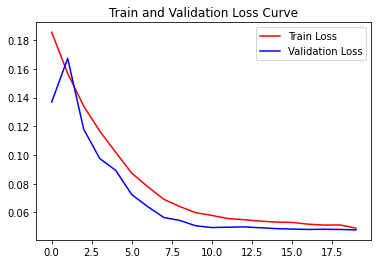

In [52]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

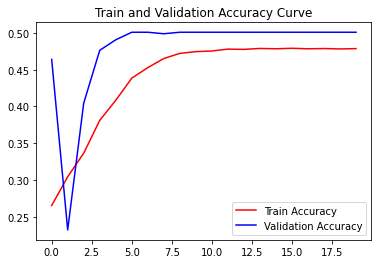

In [53]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(train_acc, color='r', label='Train Accuracy')
plt.plot(val_acc, color='b', label='Validation Accuracy')
plt.title("Train and Validation Accuracy Curve")
plt.legend()
plt.show()

In [54]:
# Creating dataset for making recommendations for the first user
hotel_data = np.array(list(set(df.property_id)))
hotel_data

array([   1,    2,    3, ..., 1309, 1310, 1311])

In [55]:
user = np.array([50 for i in range(len(hotel_data))])
user

array([50, 50, 50, ..., 50, 50, 50])

In [56]:
predictions = model.predict([user, hotel_data])

predictions = np.array([a[0] for a in predictions])

recommended_item_ids = (-predictions).argsort()

recommended_item_ids


array([ 83,  77,  47, ..., 236,  27,   7])

In [57]:
# print predicted scores
predictions[recommended_item_ids]

array([0.97756815, 0.964808  , 0.9596076 , ..., 0.35527295, 0.23155919,
       0.05958253], dtype=float32)

In [58]:
#Evaluate the model
score = model.evaluate(X_test_array, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 0.046144090592861176


In [59]:
# print predicted scores
predictions[recommended_item_ids]

array([0.97756815, 0.964808  , 0.9596076 , ..., 0.35527295, 0.23155919,
       0.05958253], dtype=float32)

In [60]:
predictions = model.predict([user, hotel_data])
predictions = np.array([a[0] for a in predictions])
recommended_hotel_id = (-predictions).argsort()
recommended_hotel_id[:10]

array([ 83,  77,  47, 300, 161,  39, 217,   6, 138,  42])

In [61]:
predictions[recommended_hotel_id]

array([0.97756815, 0.964808  , 0.9596076 , ..., 0.35527295, 0.23155919,
       0.05958253], dtype=float32)

In [62]:
predictions

array([0.8020769 , 0.90764654, 0.7286492 , ..., 0.7939087 , 0.775563  ,
       0.8247544 ], dtype=float32)

In [66]:
model.save("/content/drive/MyDrive/Hotel_Recomendation_Model_Traveloka/0.045-loss-collab-model.h5")

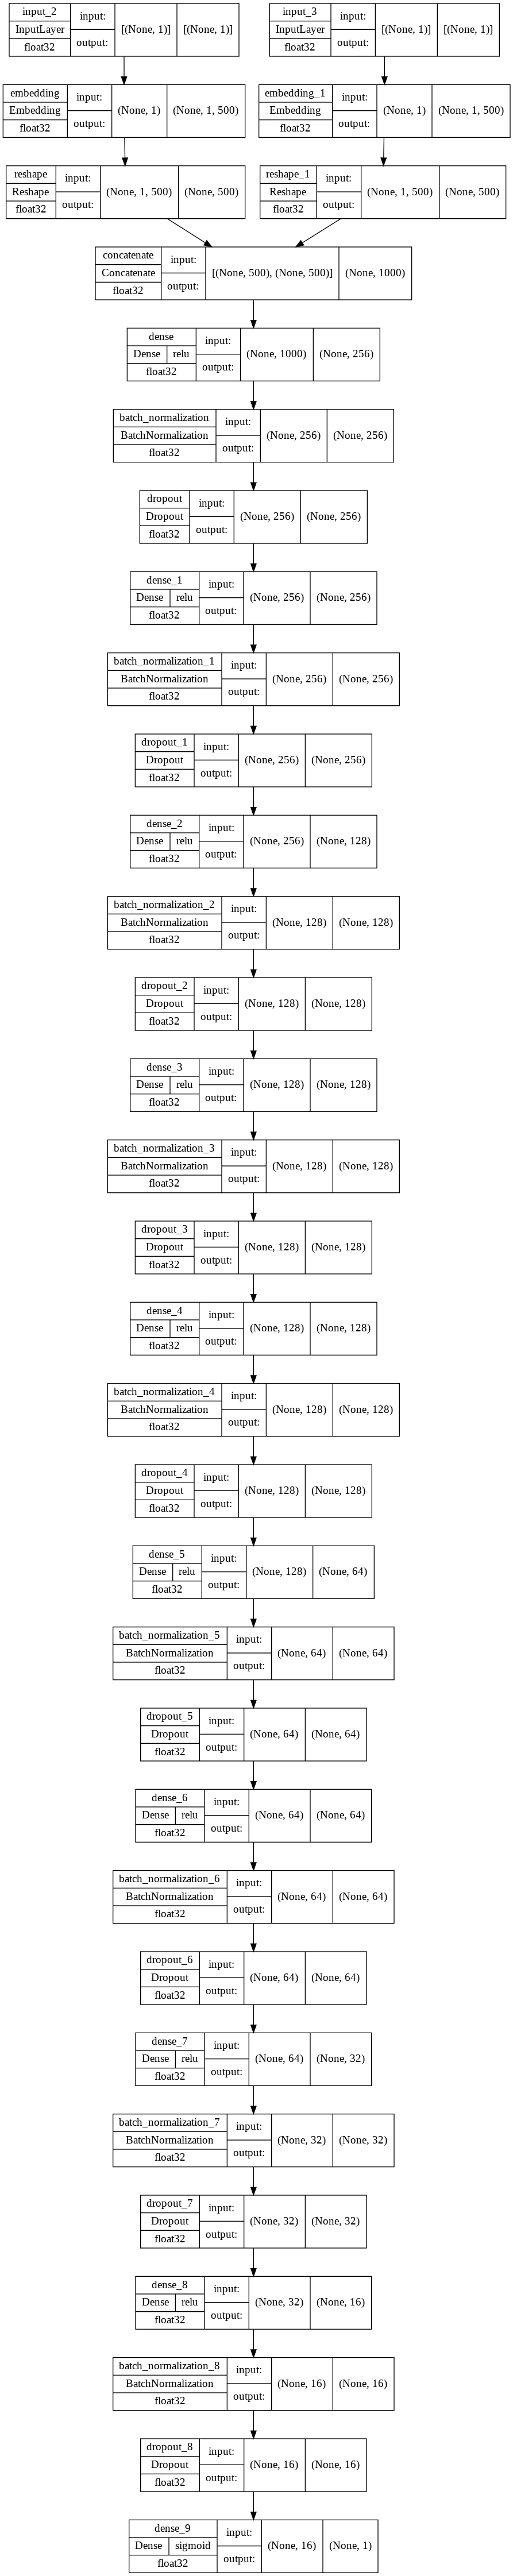

In [ ]:
model_img_file = '/content/drive/MyDrive/collab-model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [64]:
df

,user_id,property_id,user_rating
0,1,1,0.8
1,6854,1,0.4
2,4633,1,0.8
3,8326,1,0.8
4,2066,2,0.8
...,...,...,...
9743,9094,212,0.2
9744,9100,393,1.0
9745,9128,137,0.8
9746,9171,1000,1.0


In [65]:
df.to_csv(r'/content/drive/MyDrive/user-baru.csv', index=False)